# B03. Batch Effects Evalution

- **Script Function**: Evaluate batch effects across all samples in preprocessed h5ad files.  
**脚本功能**：对经过预处理的h5ad文件进行所有样本的批次效应评估。  
- **Input**: Preprocessed adjusted.cellbin.h5ad files.  
**输入**：预处理后的adjusted.cellbin.h5ad文件
- **Processing**: After reading the h5ad files, take 1/10 of the cells from each sample, integrate them, and perform batch effect evaluation.  
**处理过程**：读取h5ad后，每个样本取1/10的细胞量，整合后，进行批次效应评估。
- **Output**: Batch effect evaluation report.
**输出**：批次效应评估报告

## 0. Package importing 环境导入

In [1]:
import stereo as st
import scanpy as sc
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

from stereo.core.ms_data import MSData
from stereo.core.ms_pipeline import slice_generator
import pandas as pd
import numpy as np

## 1. Data importing 数据导入

Read according to the h5ad file path in dataLink.  
根据dataLink的信息中的h5ad进行读取

In [2]:
dataList = []
dataLink = {
    'CT1':'./processdata/B02.CT1.adjusted.cellbin.h5ad',
    'CT2':'./processdata/B02.CT2.adjusted.cellbin.h5ad',
    'CT3':'./processdata/B02.CT3.adjusted.cellbin.h5ad',
    'EP1':'./processdata/B02.EP1.adjusted.cellbin.h5ad',
    'EP2':'./processdata/B02.EP2.adjusted.cellbin.h5ad',
    'EP3':'./processdata/B02.EP3.adjusted.cellbin.h5ad',
}

                             Processing Sample: CT1                             
++ Starting to read data of sample CT1
++++ Spatial scatter plot of sample CT1


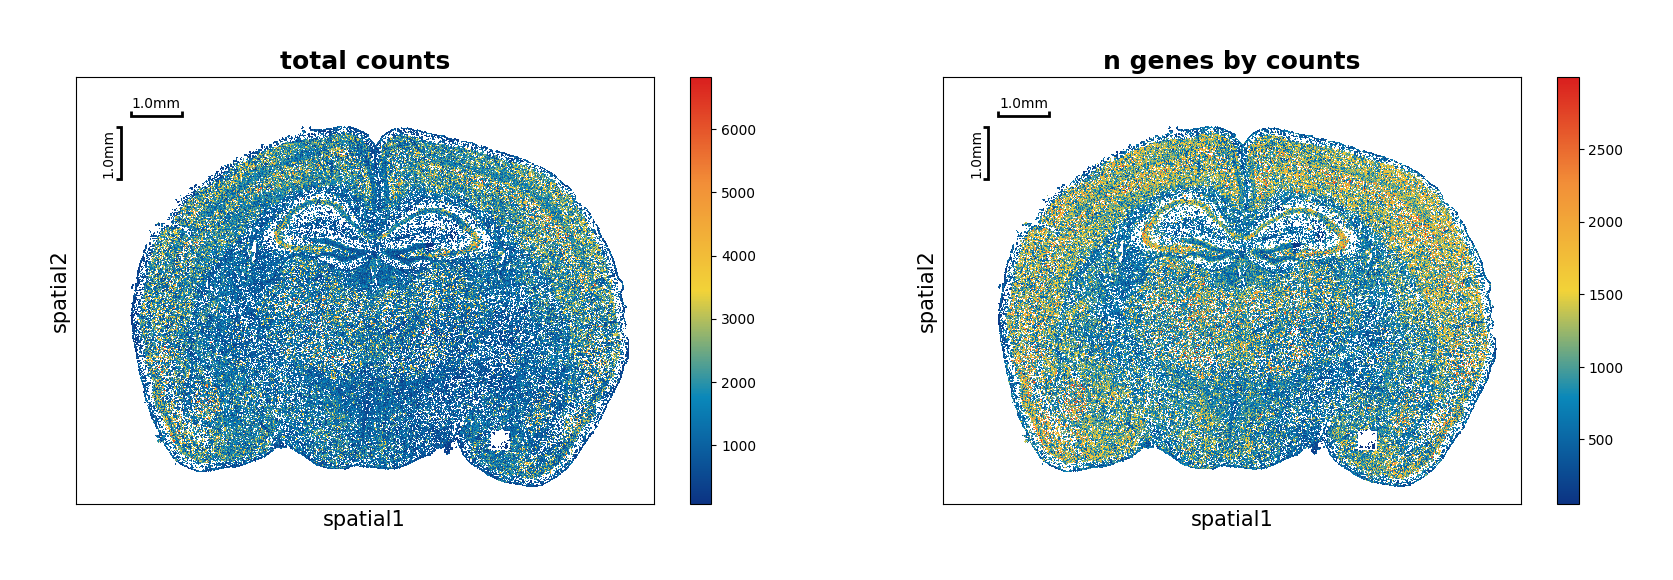

++++ Information of sample CT1
AnnBasedStereoExpData object with n_cells X n_genes = 145065 X 28871
adata: id(140716440350672)
bin_type: cell_bins
offset_x = None
offset_y = None
cells: ['cell_name', 'dnbCount', 'area', 'total_counts', 'n_genes_by_counts', 'pct_counts_mt', 'orig.ident', 'x', 'y']
genes: ['gene_name', 'n_cells', 'n_counts', 'mean_umi']
cells_matrix = ['cell_border', 'spatial']
Layers with keys: 
tl.result: []
                             Processing Sample: CT2                             
++ Starting to read data of sample CT2
++++ Spatial scatter plot of sample CT2


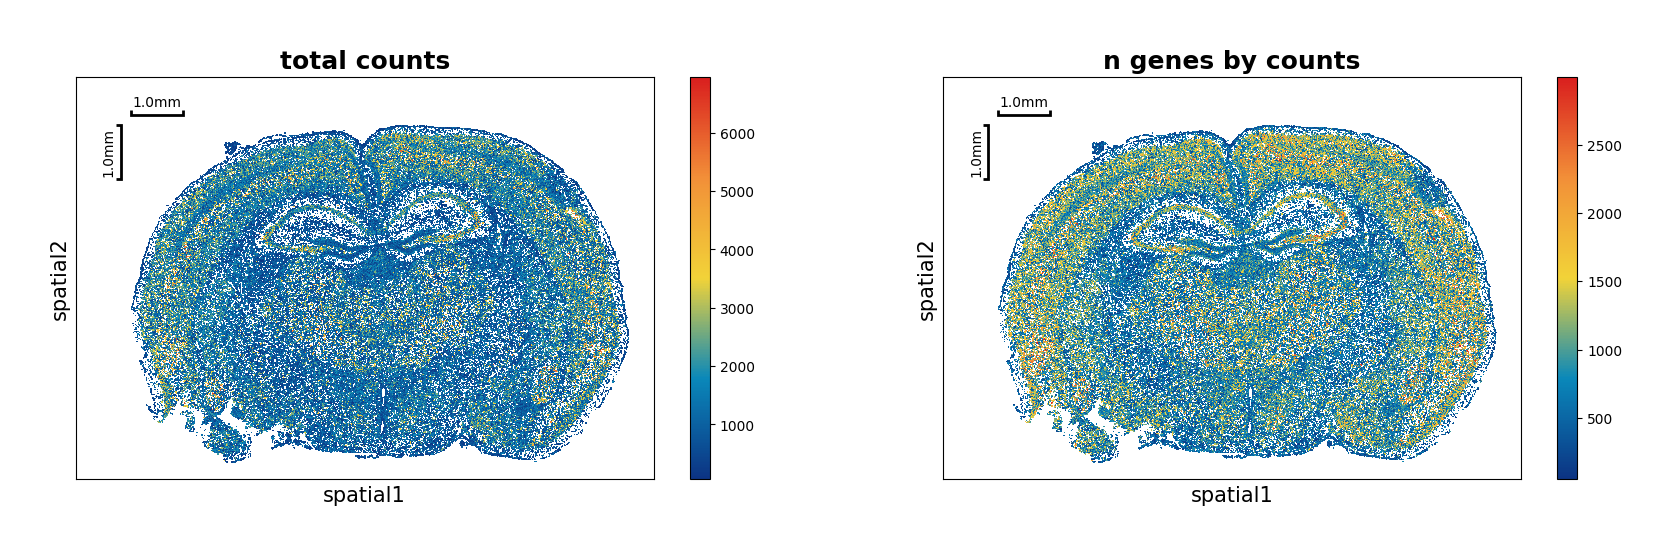

++++ Information of sample CT2
AnnBasedStereoExpData object with n_cells X n_genes = 142030 X 28807
adata: id(140716224232368)
bin_type: cell_bins
offset_x = None
offset_y = None
cells: ['cell_name', 'dnbCount', 'area', 'total_counts', 'n_genes_by_counts', 'pct_counts_mt', 'orig.ident', 'x', 'y']
genes: ['gene_name', 'n_cells', 'n_counts', 'mean_umi']
cells_matrix = ['cell_border', 'spatial']
Layers with keys: 
tl.result: []
                             Processing Sample: CT3                             
++ Starting to read data of sample CT3
++++ Spatial scatter plot of sample CT3


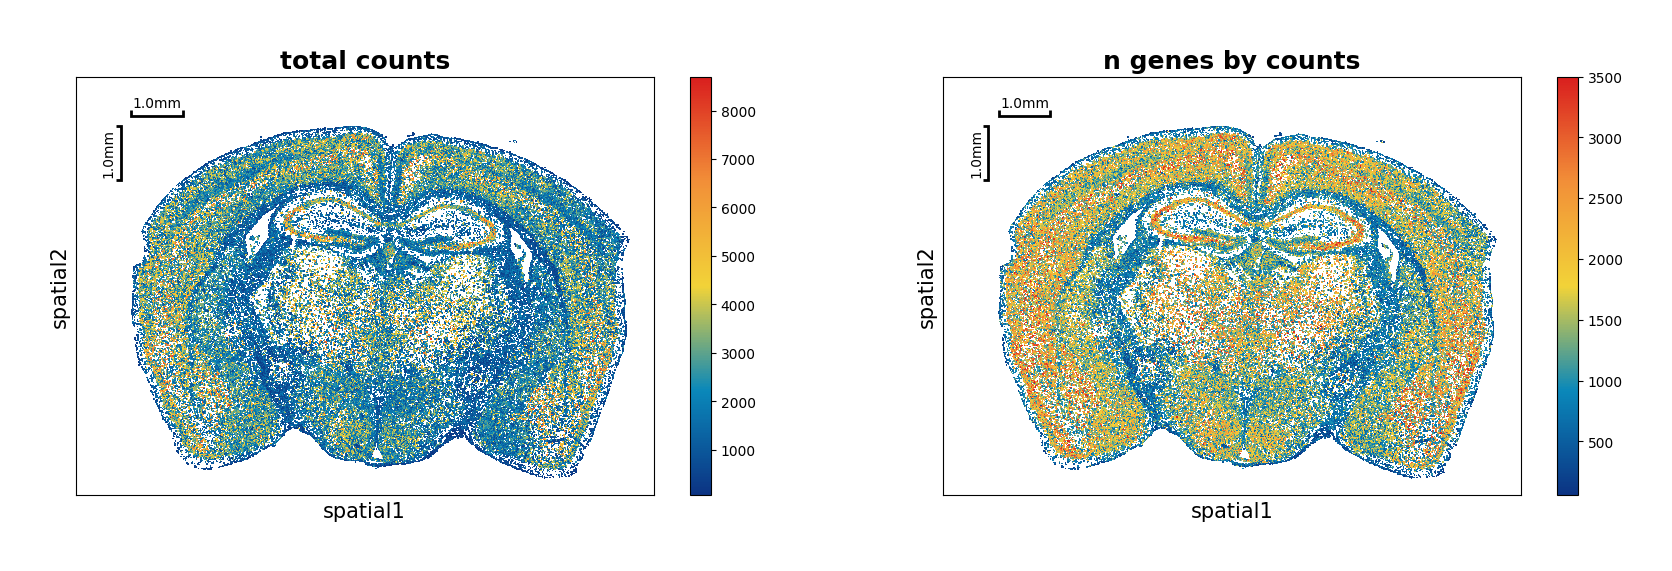

++++ Information of sample CT3
AnnBasedStereoExpData object with n_cells X n_genes = 104239 X 28846
adata: id(140716895635008)
bin_type: cell_bins
offset_x = None
offset_y = None
cells: ['cell_name', 'dnbCount', 'area', 'total_counts', 'n_genes_by_counts', 'pct_counts_mt', 'orig.ident', 'x', 'y']
genes: ['gene_name', 'n_cells', 'n_counts', 'mean_umi']
cells_matrix = ['cell_border', 'spatial']
Layers with keys: 
tl.result: []
                             Processing Sample: EP1                             
++ Starting to read data of sample EP1
++++ Spatial scatter plot of sample EP1


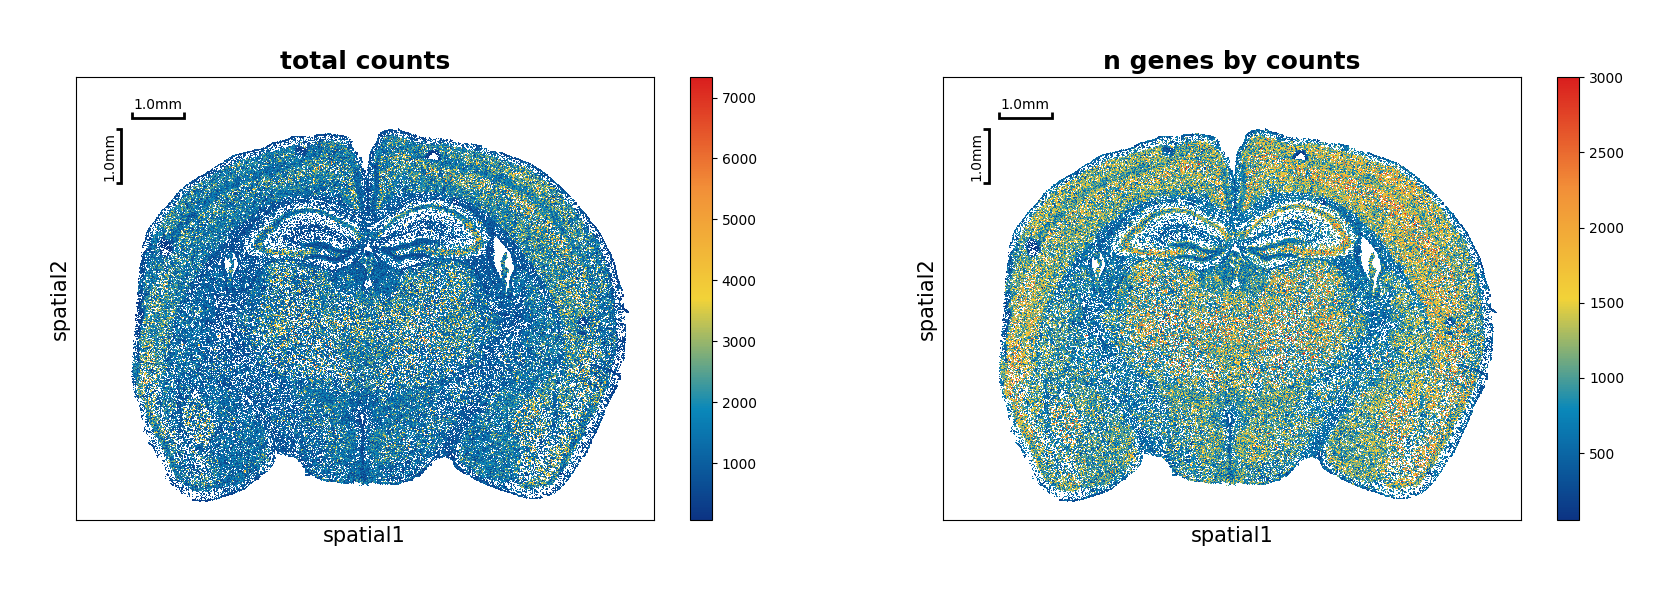

++++ Information of sample EP1
AnnBasedStereoExpData object with n_cells X n_genes = 165910 X 28819
adata: id(140716231267040)
bin_type: cell_bins
offset_x = None
offset_y = None
cells: ['cell_name', 'dnbCount', 'area', 'total_counts', 'n_genes_by_counts', 'pct_counts_mt', 'orig.ident', 'x', 'y']
genes: ['gene_name', 'n_cells', 'n_counts', 'mean_umi']
cells_matrix = ['cell_border', 'spatial']
Layers with keys: 
tl.result: []
                             Processing Sample: EP2                             
++ Starting to read data of sample EP2
++++ Spatial scatter plot of sample EP2


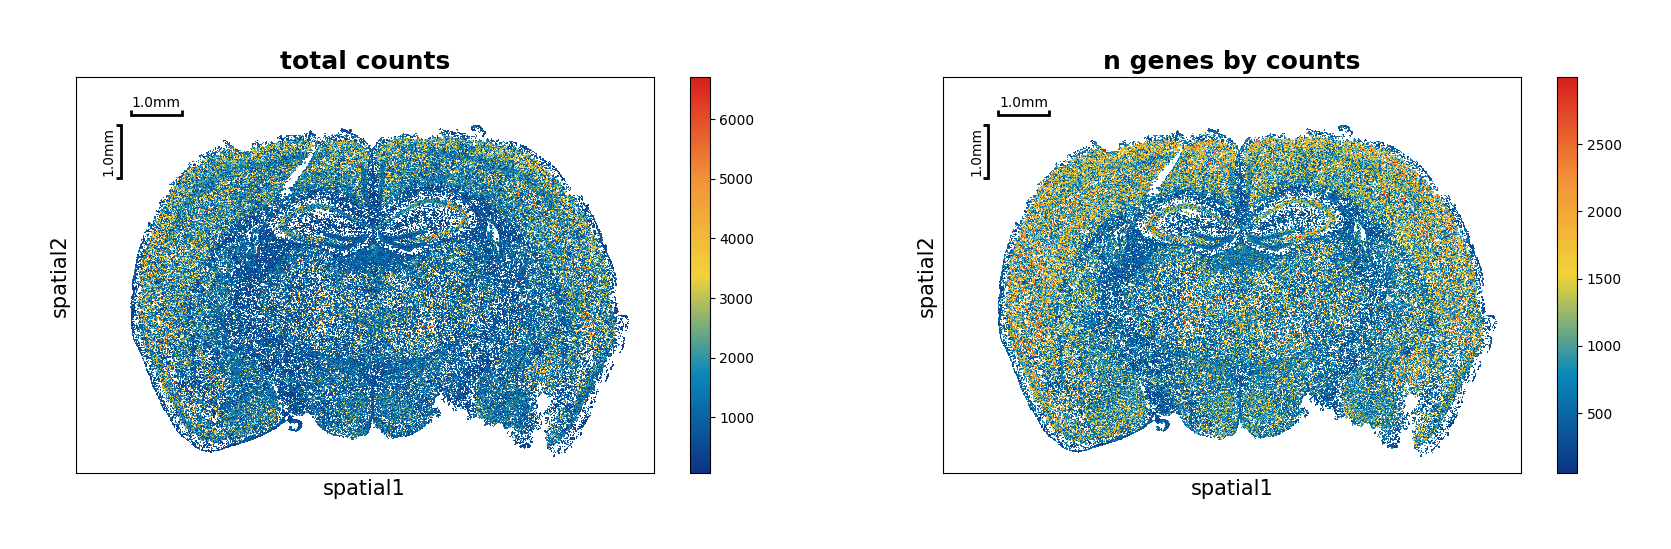

++++ Information of sample EP2
AnnBasedStereoExpData object with n_cells X n_genes = 147190 X 28750
adata: id(140712460977488)
bin_type: cell_bins
offset_x = None
offset_y = None
cells: ['cell_name', 'dnbCount', 'area', 'total_counts', 'n_genes_by_counts', 'pct_counts_mt', 'orig.ident', 'x', 'y']
genes: ['gene_name', 'n_cells', 'n_counts', 'mean_umi']
cells_matrix = ['cell_border', 'spatial']
Layers with keys: 
tl.result: []
                             Processing Sample: EP3                             
++ Starting to read data of sample EP3
++++ Spatial scatter plot of sample EP3


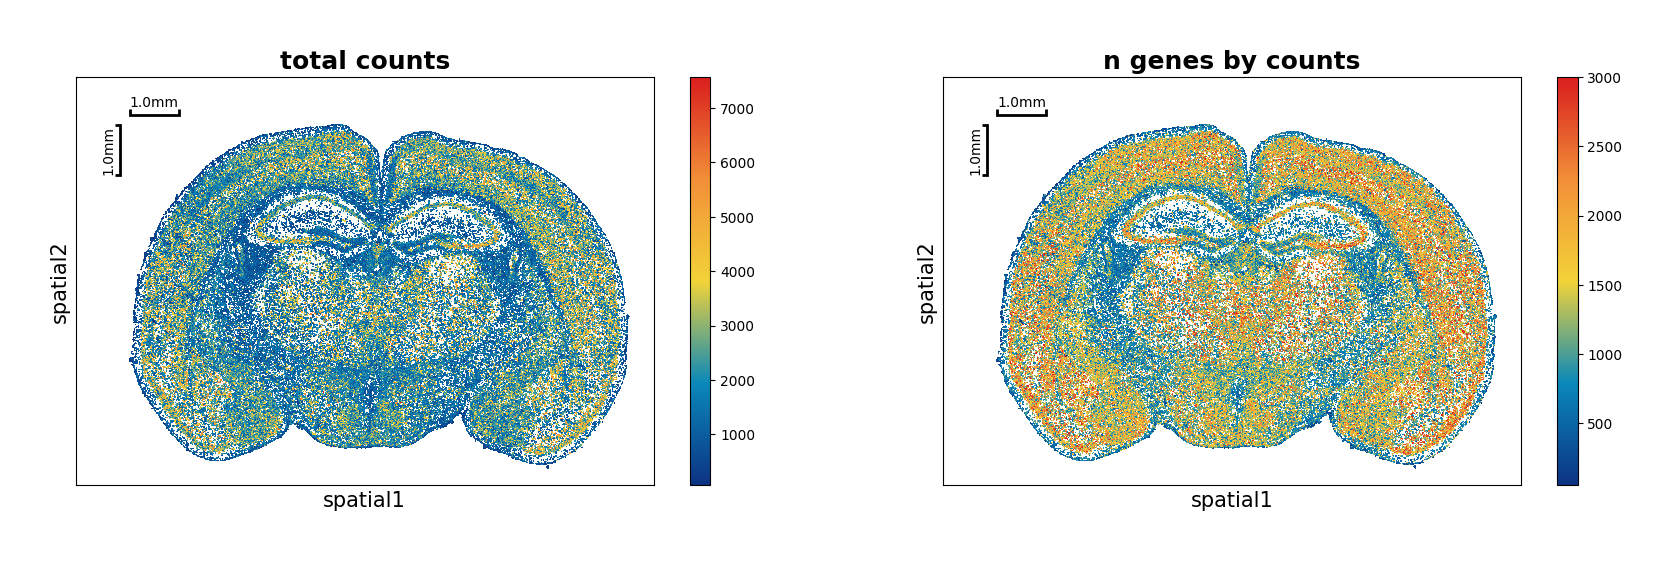

++++ Information of sample EP3
AnnBasedStereoExpData object with n_cells X n_genes = 112877 X 28920
adata: id(140712503470448)
bin_type: cell_bins
offset_x = None
offset_y = None
cells: ['cell_name', 'dnbCount', 'area', 'total_counts', 'n_genes_by_counts', 'pct_counts_mt', 'orig.ident', 'x', 'y']
genes: ['gene_name', 'n_cells', 'n_counts', 'mean_umi']
cells_matrix = ['cell_border', 'spatial']
Layers with keys: 
tl.result: []


In [3]:
# Function to print a separator line
def print_separator():
    print("=" * 80)

# Function to print a header
def print_header(message):
    print_separator()
    print(f"{message:^80}")  # Center the message
    print_separator()

for sample_name, file_path in dataLink.items():
    # Print header for each sample
    print_header(f"Processing Sample: {sample_name}")
    
    # Start reading data
    print(f"++ Starting to read data of sample {sample_name}")
    indata = st.io.read_h5ad(file_path=file_path)
    
    # Perform raw data checkpoint
    indata.tl.raw_checkpoint()
    
    # Assign the sample name to the data object
    indata.samplename = sample_name
    
    # Plot and display the spatial scatter plot
    print(f"++++ Spatial scatter plot of sample {sample_name}")
    indata.plt.spatial_scatter()
    plt.show()  # Force display of the plot
    
    # Print information about the sample data
    print(f"++++ Information of sample {sample_name}")
    print(indata)
    
    # Append the processed data to the dataList
    dataList.append(indata)
    
    # Print footer
    print_separator()

## 2. Batch Effects Evalution 批次差异评估
We can use **ms_data.tl.batch_qc** to evaluate the batch effects in the samples.  
可以使用**ms_data.tl.batch_qc**评估样本的批次效应

### 2.1 Generation of Sampled Dataset 生成抽样后评价目标  

Since each sample contains more than 100,000 cells, resulting in a large data volume, 1/10 of the data is used for batch effect evaluation. The _relationship is set to other to indicate different samples, and _var_type specifies that common genes are extracted for analysis.  

由于每个样本细胞数大于10W细胞，数据量过大，因此使用1/10的数据进行批次效应评估。_relationship设置为other说明是不同样本，_var_type表示提取共有gene进行分析。

In [4]:
from sklearn.model_selection import train_test_split

ms_data = MSData(_relationship='other', _var_type='intersect')
data_names = []

for i in dataList:
    # Assume CT1.cell_names is a list or array containing cell names
    cell_names = np.array(i.cell_names)
    # Extract 1/10 of the cells
    _, sampled_cells = train_test_split(cell_names, test_size=0.1, random_state=42)
    mini = i.sub_by_name(cell_name=sampled_cells)
    mini.tl.raw_checkpoint()
    data_names.append(i.samplename)
    ms_data += mini

You can modify the batch names using .names.  
通过.names可以修改batch的名字  

In [5]:
ms_data.integrate()
ms_data.names = ["CT1","CT2","CT3","EP1","EP2","EP3"]
ms_data

ms_data: {'CT1': (14507, 28871), 'CT2': (14203, 28807), 'CT3': (10424, 28846), 'EP1': (16591, 28819), 'EP2': (14719, 28750), 'EP3': (11288, 28920)}
num_slice: 6
names: ['CT1', 'CT2', 'CT3', 'EP1', 'EP2', 'EP3']
merged_data: id(139792695542880)
obs: ['batch']
var: []
relationship: other
var_type: intersect to 27560
current_mode: integrate
current_scope: scope_[0,1,2,3,4,5]
scopes_data: ['scope_[0,1,2,3,4,5]:id(139792695542880)']
mss: []

Perform clustering on multiple samples.  
对多样本进行聚类。  

In [6]:
# preprocessing
ms_data.tl.cal_qc(scope=slice_generator[:],mode='integrate')
ms_data.tl.raw_checkpoint()

ms_data.tl.normalize_total(scope=slice_generator[:],mode='integrate')
ms_data.tl.log1p(scope=slice_generator[:],mode='integrate')
ms_data.tl.scale(scope=slice_generator[:],mode='integrate', zero_center=False, max_value=10)

# embedding
ms_data.tl.pca(scope=slice_generator[:],mode='integrate', use_highly_genes=False, n_pcs=50, res_key='pca')
ms_data.tl.neighbors(scope=slice_generator[:],mode='integrate', pca_res_key='pca', res_key='neighbors')
ms_data.tl.umap(scope=slice_generator[:],mode='integrate', pca_res_key='pca', neighbors_res_key='neighbors', res_key='umap')

# clustering
ms_data.tl.leiden(scope=slice_generator[:],mode='integrate', neighbors_res_key='neighbors', res_key='leiden')

[2025-01-02 10:26:03][Stereo][145037][MainThread][139793160439616][ms_pipeline][135][INFO]: data_obj(idx=0) in ms_data start to run cal_qc
[2025-01-02 10:26:03][Stereo][145037][MainThread][139793160439616][st_pipeline][41][INFO]: start to run cal_qc...
[2025-01-02 10:26:08][Stereo][145037][MainThread][139793160439616][st_pipeline][44][INFO]: cal_qc end, consume time 3.4932s.
[2025-01-02 10:26:08][Stereo][145037][MainThread][139793160439616][ms_pipeline][135][INFO]: data_obj(idx=0) in ms_data start to run raw_checkpoint
[2025-01-02 10:26:09][Stereo][145037][MainThread][139793160439616][ms_pipeline][135][INFO]: data_obj(idx=0) in ms_data start to run normalize_total
[2025-01-02 10:26:09][Stereo][145037][MainThread][139793160439616][st_pipeline][41][INFO]: start to run normalize_total...
[2025-01-02 10:26:12][Stereo][145037][MainThread][139793160439616][st_pipeline][44][INFO]: normalize_total end, consume time 3.6072s.
[2025-01-02 10:26:12][Stereo][145037][MainThread][139793160439616][ms_

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs


[2025-01-02 10:29:41][Stereo][145037][MainThread][139793160439616][st_pipeline][44][INFO]: umap end, consume time 84.5263s.
[2025-01-02 10:29:41][Stereo][145037][MainThread][139793160439616][ms_pipeline][135][INFO]: data_obj(idx=0) in ms_data start to run leiden
[2025-01-02 10:29:41][Stereo][145037][MainThread][139793160439616][st_pipeline][41][INFO]: start to run leiden...
[2025-01-02 10:30:25][Stereo][145037][MainThread][139793160439616][st_pipeline][44][INFO]: leiden end, consume time 43.5595s.


[2025-01-02 10:30:30][Stereo][145037][MainThread][139793160439616][ms_pipeline][135][INFO]: data_obj(idx=0) in ms_data start to run umap


Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

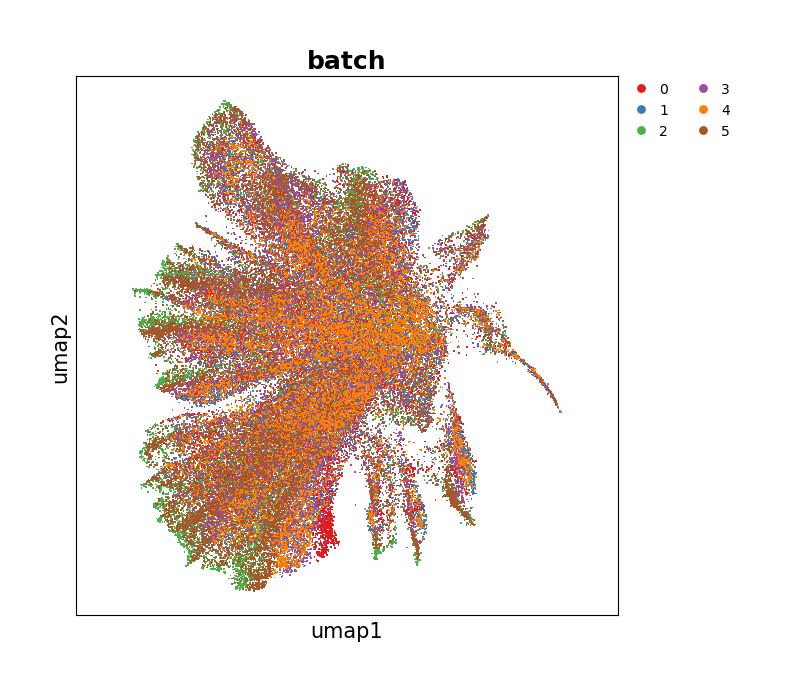

In [7]:
ms_data.plt.umap(
            cluster_key='batch',
            res_key='umap',
            scope=slice_generator[:],
            mode='integrate'
            )

Save multi-sample data.  
保存多样本数据。  

In [9]:
st.io.write_h5ms(ms_data,output='./processdata/B03.SD.h5ms')

### 2.2 Batch Difference Evaluation for Multi-Sample Data 进行多样本数据批次差异评估  

Read multi-sample data  
读取多样本数据

In [3]:
ms_data = st.io.read_h5ms("./processdata/B03.SD.h5ms")

In [4]:
ms_data.obs.head()

batch  total_counts  n_genes_by_counts  pct_counts_mt leiden  \
29076928610287-0     0          1658               1065       1.930036     13   
59459527264380-0     0           569                408       0.878735     13   
80874234202643-0     0          1985               1282       1.108312     16   
16720307694590-0     0          1102                762       1.542650     16   
73173357833629-0     0          1262                742       0.950872      1   

                 orig.ident  
29076928610287-0     sample  
59459527264380-0     sample  
80874234202643-0     sample  
16720307694590-0     sample  
73173357833629-0     sample

In [5]:
ms_data._names

['CT1', 'CT2', 'CT3', 'EP1', 'EP2', 'EP3']

In [ ]:
ms_data.tl.batch_qc(scope=slice_generator[:],mode='integrate', cluster_res_key='leiden', report_path='./batch_qc', res_key='batch_qc')

[2025-01-02 13:43:29][Stereo][180060][MainThread][140326806873920][ms_pipeline][125][INFO]: register algorithm batch_qc to <class 'stereo.core.stereo_exp_data.AnnBasedStereoExpData'>-140313834215984
[2025-01-02 14:10:11][Stereo][180060][MainThread][140326806873920][classifier][144][INFO]: Model Training Finished!
[2025-01-02 14:10:11][Stereo][180060][MainThread][140326806873920][classifier][145][INFO]: Trained checkpoint file has been saved to ./batch_qc


The command below will read **BatchQC_report_raw.html** from **report_path**, and show the report on this notebook. Due to the large size of this file, it cannot be displayed online on GitHub. You can run this command locally.  

下方命令将会读取**report_path**中的**BatchQC_report_raw.html**，并在notebook中显示。但由于本文件过大，在github中无法在线显示，可自行运行本命令

In [ ]:
ms_data.plt.show_batch_qc_report(scope=slice_generator[:], mode='integrate', res_key='batch_qc')